In [10]:
import numpy as np
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt  # for imshow
import matplotlib.colors as colors
import matplotlib.patches as patches
from scipy.cluster import vq     # for k-means and vq
import random

%matplotlib inline

In [11]:
def frist_layer(im, rescale, number_0f_dimention, N, K, P):
    if rescale == True:
        im = im/255.0    # convert to float in interval [0 1]
    if number_0f_dimention == 3:
        gim = np.mean(im[:,:,0:3],axis=2)    # find mean of RGB to create a 2D grayscale image (could be RGBA)
    elif number_0f_dimention == 2:
        gim = im
        
    # perform local contrast normlisation
    sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
    dev = (gim-sgim)
    V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
    gim = dev / np.maximum(np.sqrt(V), 0.1)
    
    sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
    dev = (gim-sgim)
    V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
    gim = dev / np.maximum(np.sqrt(V), 0.1)
    
    sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
    dev = (gim-sgim)
    V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
    gim = dev / np.maximum(np.sqrt(V), 0.1)
    
    
    R = gim.shape[0]    # number of rows in image
    C = gim.shape[1]    # number of columns in image

    X = np.zeros((P,N*N),dtype=float) # initialise array for random patches

    for i in range(0, P):
        r = random.randint(0,R-N)
        c = random.randint(0,C-N)
        patch = gim[r:r+N,c:c+N] 
        X[i,:] = np.reshape(patch,(-1))

    codebook, distortion = vq.kmeans(X,K)

    spn = np.ceil(np.sqrt(K))    # size of subplot display
    norm = colors.Normalize(vmin=codebook.min(), vmax=codebook.max())    # set gray range from minimum to maximum
    for i in range(0,K):
        plt.subplot(spn,spn,i+1)
        plt.imshow(np.reshape(codebook[i,:],(N,N)),cmap='gray',norm=norm)
        plt.gca().add_patch(patches.Circle((2,2), radius=1, color=plt.cm.tab20(i)))
        plt.axis('off')    # turn off the axes

    X = np.zeros(((R-N)*(C-N),N*N),dtype=float)   # initialise array for all patches
    i=0
    for r in range(0,R-N):
        for c in range(0,C-N):
            X[i,:] = np.reshape(gim[r:r+N,c:c+N],(-1))
            i=i+1
    
    code, dist = vq.vq(X,codebook)
    code = np.reshape(code,(R-N,C-N))    # reshape the 1D code array into the original 2D image shape
    
    return code

In [12]:
def second_layer(gim, M, K, P, last_K):

    R = gim.shape[0]    # number of rows in image
    C = gim.shape[1]    # number of columns in image

    X = np.zeros((P,M*M),dtype=int) # initialise array for random patches

    for i in range(0, P):
        r = random.randint(0,R-M)
        c = random.randint(0,C-M)
        patch = gim[r:r+M,c:c+M] 
        X[i,:] = np.reshape(patch,(-1))

    Y = np.zeros((P,last_K),dtype=int) # initialise array for histogram of P random patches
    for i in range(0, P):
        histogram = np.bincount(X[i].reshape(-1),minlength=last_K)
        Y[i] = histogram

    codebook, distortion = vq.kmeans(Y/1.0,K)

    Z = np.zeros(((R-M)*(C-M),M*M),dtype=int)   # initialise array for all patches
    i=0
    for r in range(0,R-M):
        for c in range(0,C-M):
            Z[i,:] = np.reshape(gim[r:r+M,c:c+M],(-1))
            i=i+1

    Q = np.zeros(((R-M)*(C-M),last_K),dtype=int) # initialise array for histogram of all patches
    for i in range(0, (R-M)*(C-M)):
        histogram = np.bincount(Z[i].reshape(-1),minlength=last_K)
        Q[i] = histogram

    code, dist = vq.vq(Q,codebook)
    code = np.reshape(code,(R-M,C-M))    # reshape the 1D code array into the original 2D image shape

    return code

In [13]:
def show_image(im):
    plt.figure()
    norm = colors.NoNorm()
    plt.imshow(im, cmap='tab20', norm=norm)
    plt.axis('off')    # turn off the axes

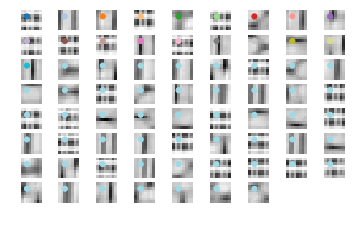

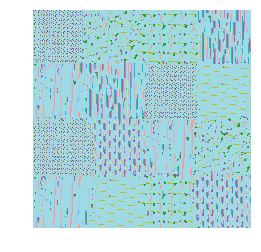

In [26]:
im = plt.imread('patchwork1.jpg')
image_from_1st_layer = frist_layer(im, True, im.ndim, 8, 70, 20000)
show_image(image_from_1st_layer)

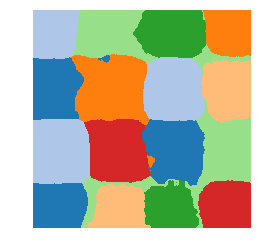

In [27]:
image_from_2st_layer = second_layer(image_from_1st_layer, 25, 7, 20000, 70)
show_image(image_from_2st_layer)

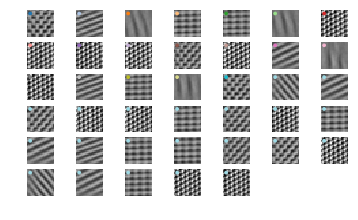

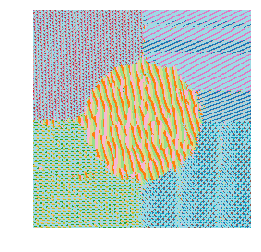

In [28]:
im = plt.imread('patchwork2.pbm')
image_from_1st_layer = frist_layer(im, True, im.ndim, 20, 40, 20000)
show_image(image_from_1st_layer)

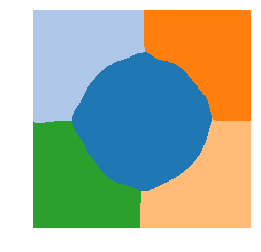

In [29]:
image_from_2st_layer = second_layer(image_from_1st_layer, 25, 5, 20000, 40)
show_image(image_from_2st_layer)

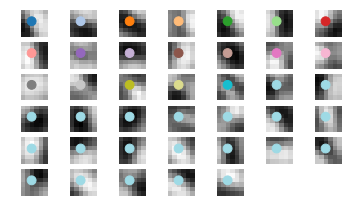

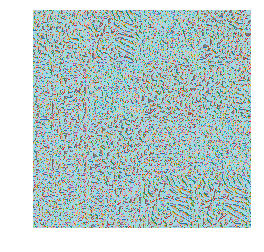

In [33]:
im = plt.imread('patchwork6.png')
image_from_1st_layer = frist_layer(im, False, im.ndim, 6, 40, 20000)
show_image(image_from_1st_layer)

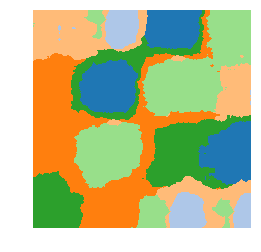

In [34]:
image_from_2st_layer = second_layer(image_from_1st_layer, 70, 6, 20000, 40)
show_image(image_from_2st_layer)

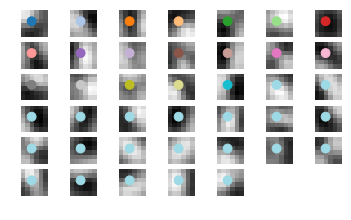

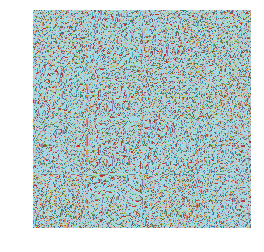

In [32]:
im = plt.imread('patchwork7.png')
image_from_1st_layer = frist_layer(im, False, im.ndim, 6, 40, 20000)
show_image(image_from_1st_layer)

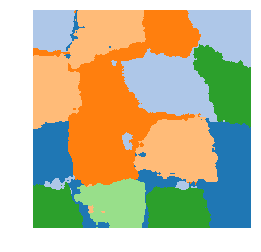

In [25]:
image_from_2st_layer = second_layer(image_from_1st_layer, 70, 6, 20000, 40)
show_image(image_from_2st_layer)